In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
scheme = {'blue':'#2f788e', 'red':'#d15b4f', 'green':'#45b563', 'grey':'#8a8888'}

plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'Arial'

In [3]:
def set_size(w,h, ax=None):
    """ w, h: width, height in inches """
    if not ax: ax=plt.gca()
    l = ax.figure.subplotpars.left
    r = ax.figure.subplotpars.right
    t = ax.figure.subplotpars.top
    b = ax.figure.subplotpars.bottom
    figw = float(w)/(r-l)
    figh = float(h)/(t-b)
    ax.figure.set_size_inches(figw, figh)

In [4]:
def seqDist(s1, s2):
    return sum([1 if b1 != b2 else 0 for b1, b2 in zip(s1, s2)])

In [5]:
df = pd.read_csv('../../datasets/datasets_prepped/strc_km.csv', usecols=['cpm', 'varseq'])

In [6]:
aurora2 = 'GGAAGGGATGACTATGTCCGGTTCCTGTAAGGCATGTGGAGTGTTGT'
aurora_strc_positions_0 = [3,5,10,11,13,14,15,16,21,22,25,26,27,28,29,33,36,39,41,42,43,44,45,46]
aurora2 = ''.join([aurora2[x] for x in aurora_strc_positions_0])

In [7]:
aurora2_cpm = df[df['varseq'] == aurora2].iloc[0]['cpm']
df['d'] = [seqDist(s, aurora2) for s in df['varseq']]
df['fold_improvement'] = [c / aurora2_cpm for c in df['cpm']]

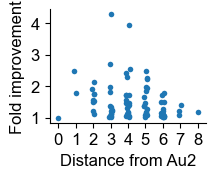

In [8]:
sns.stripplot(data=df[df['fold_improvement'] >= 1], x='d', y='fold_improvement', color='tab:blue', size=4)
plt.yticks([1, 2, 3, 4])
set_size(1.8, 1.5)
plt.ylabel('Fold improvement')
plt.xlabel('Distance from Au2')
sns.despine()
plt.tight_layout()
plt.savefig('fold_improvement_rel_au2_vs_dist_from_au2.svg')

In [9]:
df_improved = df[df['fold_improvement'] >= 1]

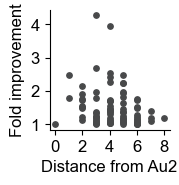

In [10]:
# Define absolute axis size in inches
axis_width = 1.2  # Width in inches
axis_height = 1.2  # Height in inches

# Define margins
left_margin = 0.5
bottom_margin = 0.5

# Compute figure size to ensure fixed axis size
fig_width = left_margin + axis_width + 0.5
fig_height = bottom_margin + axis_height + 0.5

fig = plt.figure(figsize=(fig_width, fig_height))

# Manually place the axes (left, bottom, width, height) in figure coordinates (0-1 range)
ax = fig.add_axes([
    left_margin / fig_width,
    bottom_margin / fig_height,
    axis_width / fig_width,
    axis_height / fig_height
])

# Plot
plt.scatter(df_improved['d'], df_improved['fold_improvement'], color='#48494a', s=15)

plt.xticks([0, 2, 4, 6, 8])
plt.yticks([1, 2, 3, 4])

plt.xlabel('Distance from Au2')
plt.ylabel('Fold improvement')

sns.despine()
plt.savefig('fold_improvement_rel_au2_vs_dist_from_au2.svg')